In [1]:
import sys
from pathlib import Path
prediction_mode_path = Path("../module")
sys.path.append(prediction_mode_path.as_posix())
import predictions_v05 as pred_mode

import pandas as pd
import numpy as np

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
## maybe some hyperparameters optimization? 
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

### model_type ==
#### RandomForestRegressor

#### DecisionTreeRegressor

#### KNeighborsRegressor

#### SVR

#### linear_model



In [2]:
molecular_descriptors_df = pred_mode.prepare_data('../Data/Indole_-_cytoprotekcja_.xlsx')

 61%|██████████████████████████████████████████████████▎                               | 27/44 [00:01<00:00, 20.85it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:01<00:00, 22.97it/s]


Data size (rows, columns): (44, 1613)
Data size after first reduction (rows, columns): (44, 1433)
Data size after second reduction (rows, columns): (44, 1182)


In [3]:
without_standardization, train_r2_, test_r2_, hist1, hist2 = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = 0.33, 
                                                                                                    standardization = False, 
                                                                                                    model_type = 'KNeighborsRegressor',
                                                                                                    train_test_split_ = False, 
                                                                                                    verbose = True)

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.105872
1                  AATS0are    0.160494
2                    AATS0d   -0.005044
3                   AATS0dv    0.121256
4                    AATS0i    0.140698
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.105872                    0.105872
1                  AATS0are    0.160494                    0.160494
2                    AATS0d   -0.005044                    0.005044
3                   AATS0dv    0.121256                    0.121256
4                    AATS0i    0.140698                    0.140698
    molecular descriptor name  corr_value  absolute correlation value
456                BCUTare-1l    0.345707                    0.345707
520       

Target distribution histogram: 
AxesSubplot(0.125,0.11;0.775x0.77)


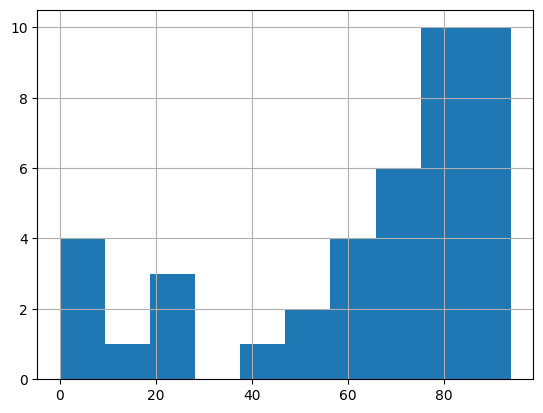

In [4]:
print('Target distribution histogram: ')
print(hist1['Cytoprotective activity [%]'].hist())

In [5]:
print("Number of features (molecular descriptors used): "+ str(len(hist2)))

Number of features (molecular descriptors used): 12


In [6]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
456,BCUTare-1l,0.345707,0.345707
520,ETA_dEpsilon_D,0.412783,0.412783
829,NaaNH,0.386873,0.386873
831,NaaS,-0.343855,0.343855
899,SaaNH,0.359872,0.359872
901,SaaS,-0.343855,0.343855
913,SlogP_VSA1,0.338615,0.338615
1030,VR1_A,-0.339451,0.339451
1040,VR2_A,-0.339146,0.339146
1126,n6HRing,0.362058,0.362058


In [7]:
with_standardization, train_r2, test_r2, hist1_, hist2_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = 0.33, 
                                                                                                    standardization = True, 
                                                                                                    model_type = 'KNeighborsRegressor',
                                                                                                    train_test_split_ = True, 
                                                                                                    verbose = True)

I am doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.105872
1                  AATS0are    0.160494
2                    AATS0d   -0.005044
3                   AATS0dv    0.121256
4                    AATS0i    0.140698
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.105872                    0.105872
1                  AATS0are    0.160494                    0.160494
2                    AATS0d   -0.005044                    0.005044
3                   AATS0dv    0.121256                    0.121256
4                    AATS0i    0.140698                    0.140698
    molecular descriptor name  corr_value  absolute correlation value
456                BCUTare-1l    0.345707                    0.345707
520           

In [8]:
with_standardization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']])

array([60.4, 77.7, 68.3, 70. , 77.7, 68.3, 68.3, 70. , 58. , 60.4, 48.4,
       73.1, 59.2, 57.2, 48.4, 61. , 61. , 66. , 48.4, 68. , 82.8, 60.8,
       68.8, 70.6, 45.4, 66. , 60.6, 45.4, 66. , 84.4, 72.2, 84.4, 66. ,
       60.6, 70.6, 44.2, 44.2, 70.6, 70.6, 70.6, 65.6, 82.8, 82.8, 82.8])

In [9]:
xs = r2_score(with_standardization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']]), molecular_descriptors_df['Cytoprotective activity [%]'])
xs

-4.162443990057375

## Search inside correlation space

In [10]:
step = 0.01
initial_step = 0.25
last_step = 0.4
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
f_list = []
for i in first_list:
    without_standardization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standardization = False, 
                                                                                                    model_type = 'KNeighborsRegressor',
                                                                                                    train_test_split_ = False, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    f_list.append(len(h_))


In [11]:
df_without_standardization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_without_standardization['Training data R^2 score'] = second_list
df_without_standardization['Test data R^2 score'] = third_list
df_without_standardization['Number of features'] = f_list

In [12]:
df_without_standardization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features
0,0.25,0.251489,-1048.648368,46
1,0.26,0.251489,-1048.648368,38
2,0.27,0.268259,-21.036806,30
3,0.28,0.154581,-17.898495,28
4,0.29,0.249514,-7.664164,26
5,0.30,0.236136,-7.664164,21
6,0.31,0.236136,-7.664164,20
7,0.32,0.236136,-7.664164,15
8,0.33,0.225092,-7.664164,12
9,0.34,0.252211,-20.738541,9


In [13]:
step = 0.01
initial_step = 0.25
last_step = 0.4
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
f_list = []
for i in first_list:
    without_standardization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standardization = True, 
                                                                                                    model_type = 'KNeighborsRegressor',
                                                                                                    train_test_split_ = False, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    f_list.append(len(h_))

In [14]:
df_with_standardization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_with_standardization['Training data R^2 score'] = second_list
df_with_standardization['Test data R^2 score'] = third_list
df_with_standardization['Number of features'] = f_list

In [15]:
df_with_standardization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features
0,0.25,0.351194,-26.877789,46
1,0.26,0.401551,-38.472134,38
2,0.27,0.390759,-1.265556,30
3,0.28,0.390730,-1.265556,28
4,0.29,0.429714,-1.204596,26
5,0.30,0.405096,-1.574883,21
6,0.31,0.334761,-1.244600,20
7,0.32,0.382480,-4.337443,15
8,0.33,0.274795,-1.406536,12
9,0.34,0.220312,0.667091,9


## Plots

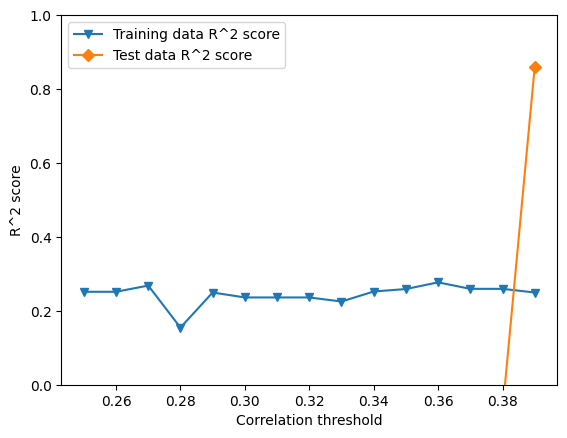

In [16]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Training data R^2 score'], label = "Training data R^2 score", marker='v')
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Test data R^2 score'], label = "Test data R^2 score", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R^2 score')
plt.ylim([0, 1])
plt.show()

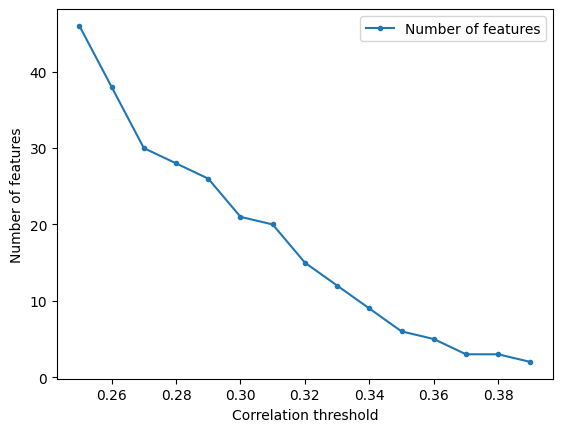

In [17]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

## sqrt(R^2)

In [18]:
df_without_standardization['train R value'] = [np.sqrt(x) for x in df_without_standardization['Training data R^2 score']]

In [19]:
df_without_standardization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,train R value
0,0.25,0.251489,-1048.648368,46,0.501487
1,0.26,0.251489,-1048.648368,38,0.501487
2,0.27,0.268259,-21.036806,30,0.517937
3,0.28,0.154581,-17.898495,28,0.393168
4,0.29,0.249514,-7.664164,26,0.499514
5,0.30,0.236136,-7.664164,21,0.485938
6,0.31,0.236136,-7.664164,20,0.485938
7,0.32,0.236136,-7.664164,15,0.485938
8,0.33,0.225092,-7.664164,12,0.474438
9,0.34,0.252211,-20.738541,9,0.502206


In [20]:
xcz = []
for element in df_without_standardization['Test data R^2 score']:
    x = np.sqrt(element)
    try:
        if x > 0:
            xcz.append(x)
        else:
            xcz.append(0)
    except:
        pass
    

In [21]:
df_without_standardization['test R value'] = xcz

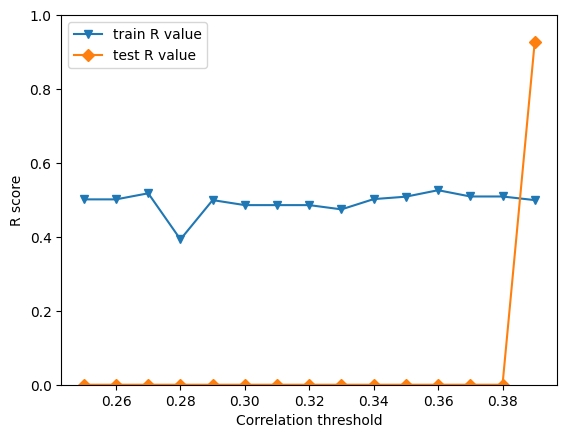

In [22]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['train R value'], label = "train R value", marker='v')
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['test R value'], label = "test R value", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R score')
plt.ylim([0, 1])
plt.show()

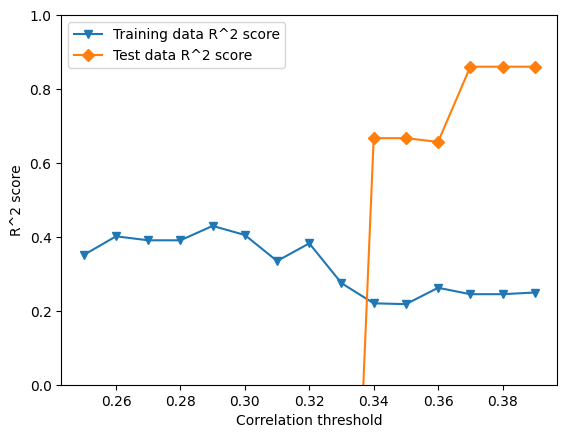

In [23]:
plt.plot(df_with_standardization['Correlation threshold'], df_with_standardization['Training data R^2 score'], label = "Training data R^2 score", marker='v')
plt.plot(df_with_standardization['Correlation threshold'], df_with_standardization['Test data R^2 score'], label = "Test data R^2 score", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R^2 score')
plt.ylim([0, 1])
plt.show()

## Final model

In [24]:
final_model = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                      correlation_threshold = 0.34, 
                                                      standardization = False, 
                                                      model_type = 'KNeighborsRegressor', 
                                                      train_test_split_ = False, 
                                                      verbose = True)

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.105872
1                  AATS0are    0.160494
2                    AATS0d   -0.005044
3                   AATS0dv    0.121256
4                    AATS0i    0.140698
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.105872                    0.105872
1                  AATS0are    0.160494                    0.160494
2                    AATS0d   -0.005044                    0.005044
3                   AATS0dv    0.121256                    0.121256
4                    AATS0i    0.140698                    0.140698
    molecular descriptor name  corr_value  absolute correlation value
456                BCUTare-1l    0.345707                    0.345707
520       

In [25]:
final_model[0].get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Predict target feature

In [ ]:
Err

In [ ]:
to_prediction = pred_mode.prepare_data('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')

In [ ]:
predicted_activity = final_model[0].predict(to_prediction[final_model[4]['molecular descriptor name']])

In [ ]:
smiles = pd.read_excel('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')
smiles = smiles['new_SMILES']
smiles = smiles.to_list()
save_to_df = pd.DataFrame(data=smiles, columns=['SMILES'])

In [ ]:
print(len(smiles))
print(len(predicted_activity))

In [ ]:
save_to_df.head()

In [ ]:
save_to_df['Predicted activity'] = predicted_activity

In [ ]:
save_to_df.head()

In [ ]:
#save_to_df.to_excel('../Data/Predicted_activity.xlsx')